In [160]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import plotly.express as px

In [161]:
# Use the Pathlib libary to set the path to the CSV
evict_path = Path('../data/cleandata/eviction_data.csv')
flood_100_path = Path('../data/cleandata/flood_100yr_clean.csv')
food_path = Path('../data/cleandata/food_desert.csv')
road_path = Path('../data/cleandata/road_flooding_imelda.csv')
school_path = Path('../data/cleandata/school_ratings_data.csv')
svi_path = Path('../data/cleandata/svi_index.csv')

In [162]:
# Use the Pathlib libary to set the path to the CSV
#index_col='FIPS'
eviction_df = pd.read_csv(evict_path)
flood_df = pd.read_csv(flood_100_path)
food_df = pd.read_csv(food_path)
road_df = pd.read_csv(road_path)
school_df = pd.read_csv(school_path)
svi_df = pd.read_csv(svi_path)

In [163]:
eviction_df.shape

(762, 8)

In [164]:
eviction_df.set_index("FIPS", inplace=True)
eviction_df.head()

,year,population,poverty-rate,median-household-income,median-property-value,evictions,eviction-rate
FIPS,,,,,,,
48201100000,2016,4366.0,1.69,82004.0,229700.0,47.0,3.02
48201210400,2016,4825.0,33.75,23456.0,116900.0,43.0,4.10
48201210500,2016,6061.0,31.28,30996.0,110600.0,15.0,1.59
48201210600,2016,5391.0,14.30,48026.0,159200.0,8.0,0.89
48201210700,2016,2176.0,31.80,24458.0,88500.0,11.0,2.91


In [179]:
flood_df = flood_df.groupby('FIPS').mean()
#flood_df.set_index("FIPS", inplace=True)
flood_df.head()

,Pct_in_100yr
FIPS,
48201210100,0.000000
48201210400,0.032204
48201210500,0.000000
48201210600,0.000000
48201210700,0.000000


In [181]:
food_df = food_df.groupby('FIPS').mean()
#food_df.set_index("FIPS", inplace=True)
food_df.head()

,Urban,LATracts_half,LATracts1,LATracts10,LATracts20
FIPS,,,,,
48201100000,1,0,0,0,0
48201210100,1,1,0,0,0
48201210400,1,1,0,0,0
48201210500,1,1,0,0,0
48201210600,1,1,0,0,0


In [136]:
road_df.set_index("FIPS", inplace=True)
road_df.head()

,Intersection,Lat,Long
FIPS,,,
48201212400,I-10 and McCarty,29.778123,-95.284054
48201210100,I-10 and San Jacinto,29.767983,-95.356149
48201211300,I-10 and Waco St,29.772891,-95.326537
48201522302,I-10 and Gessner Rd,29.784885,-95.543884
48201520500,I-10 and 610W,29.798637,-95.451017


In [183]:
school_df = school_df.groupby('FIPS').mean()
#school_df.set_index("FIPS", inplace=True)
school_df

,Zip,Rating
FIPS,,
48157670101,77053.0,2.0
48157670200,77053.0,5.0
48157670700,77053.0,3.0
48157672400,77083.0,5.0
48157672601,77083.0,5.0
...,...,...
48201552800,77069.0,6.0
48201553001,77068.0,6.0
48201553100,77090.0,5.0


In [185]:
svi_df = svi_df.groupby('FIPS').mean()
#svi_df.set_index("FIPS", inplace=True)
svi_df.head()

,Socioeconomic,Housing - Disability,Minority Status - Language,Housing - Transportation,SVI INDEX
FIPS,,,,,
48201100000,0.2757,0.0427,0.5096,0.8991,0.3868
48201210100,0.4032,0.2962,0.7744,0.8837,0.6200
48201210400,0.9354,0.9624,0.9392,0.9257,0.9873
48201210500,0.9722,0.7933,0.9263,0.9301,0.9754
48201210600,0.4276,0.5120,0.7461,0.2809,0.4706


(366, 17)

In [202]:
full_dataset = pd.concat([eviction_df, food_df, flood_df, school_df, svi_df], join='outer',axis=1, sort=False)
full_dataset
#list(full_dataset)

,year,population,poverty-rate,median-household-income,median-property-value,evictions,eviction-rate,Urban,LATracts_half,LATracts1,LATracts10,LATracts20,Pct_in_100yr,Zip,Rating,Socioeconomic,Housing - Disability,Minority Status - Language,Housing - Transportation,SVI INDEX
FIPS,,,,,,,,,,,,,,,,,,,,
48157670101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,2.0,NaN,NaN,NaN,NaN,NaN
48157670200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,5.0,NaN,NaN,NaN,NaN,NaN
48157670700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,3.0,NaN,NaN,NaN,NaN,NaN
48157672400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77083.0,5.0,NaN,NaN,NaN,NaN,NaN
48157672601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77083.0,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48201555701,2016.0,8328.0,0.91,111453.0,170200.0,8.0,4.85,1.0,1.0,1.0,0.0,0.0,0.000000,NaN,NaN,0.0522,0.3123,0.2731,0.1215,0.1035
48201555702,2016.0,11156.0,2.64,128285.0,223700.0,8.0,4.57,1.0,1.0,1.0,0.0,0.0,0.000000,NaN,NaN,0.0746,0.0987,0.2134,0.0902,0.0466
48201556000,2016.0,7589.0,12.40,59780.0,106300.0,13.0,1.88,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.4009,0.4415,0.6219,0.6630,0.5363


In [199]:
full_1 = full_dataset.reset_index() 
full_1['FIPS'].duplicate

AttributeError: 'Series' object has no attribute 'duplicate'

In [203]:
#data frame to csvfile
full_dataset.to_csv(r'../data/cleandata/join_data.csv')

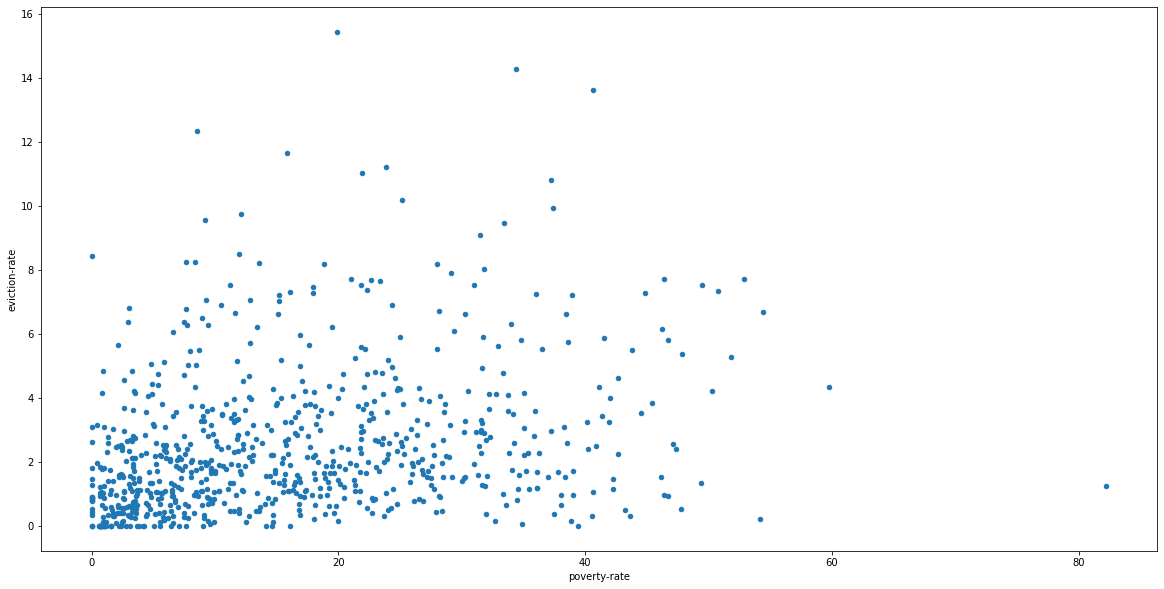

In [158]:
ax1 = eviction_df.plot.scatter(x='poverty-rate',
                                y='eviction-rate',
                                 figsize = (20,10))

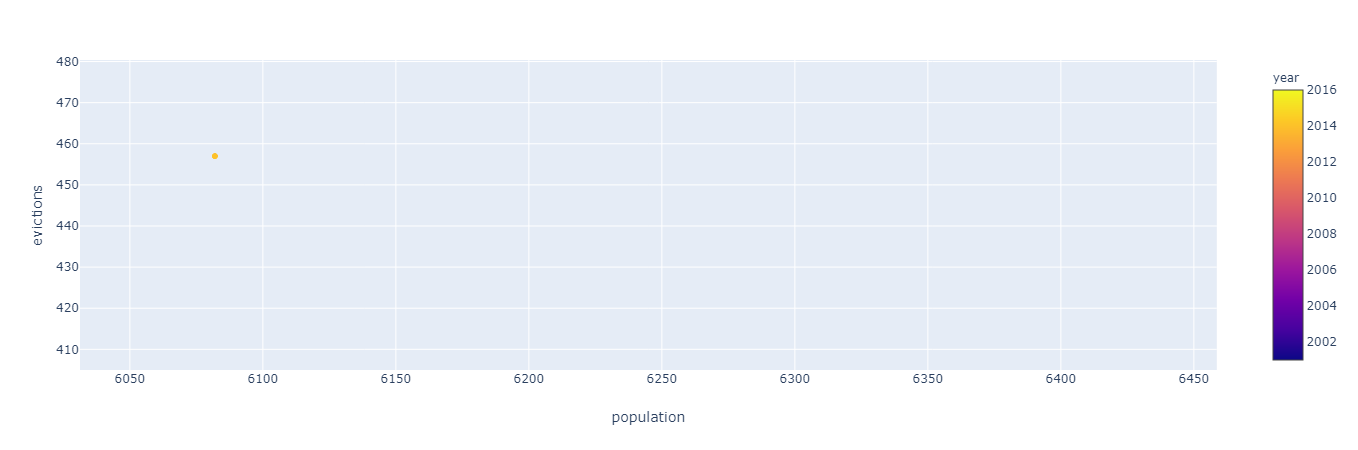

In [71]:
ax2 = px.scatter(eviction_df, x= "population", y = "evictions", color = "year")
ax2.show()

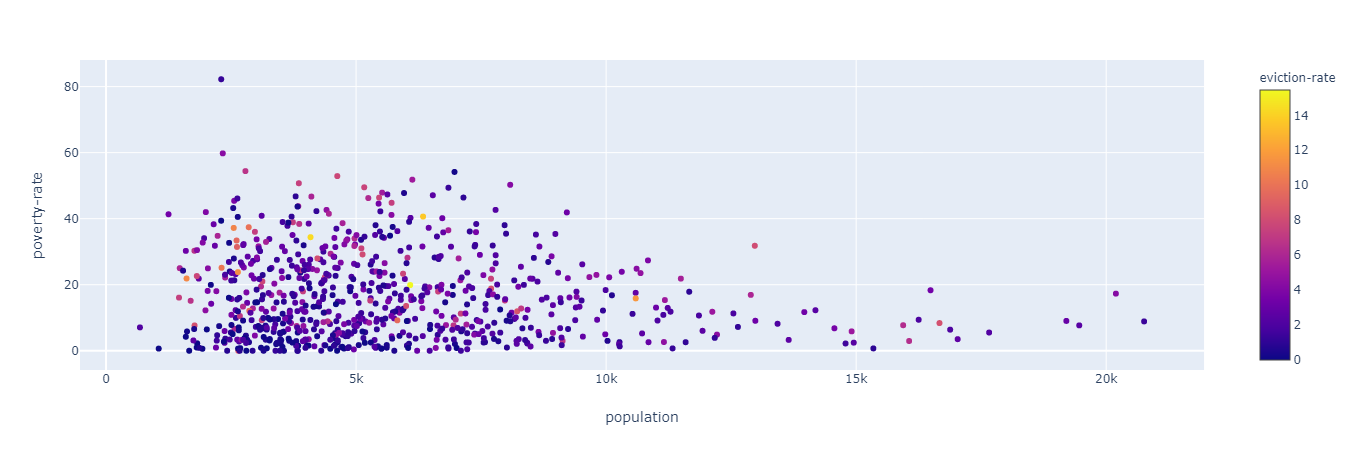

In [72]:
ax3 = px.scatter(eviction2016_df, x= "population", y = "poverty-rate", color = "eviction-rate")
ax3.show()

In [92]:
full_dataset['Rating'].isna().count()

3505

In [93]:
full_dataset.shape

(3505, 41)

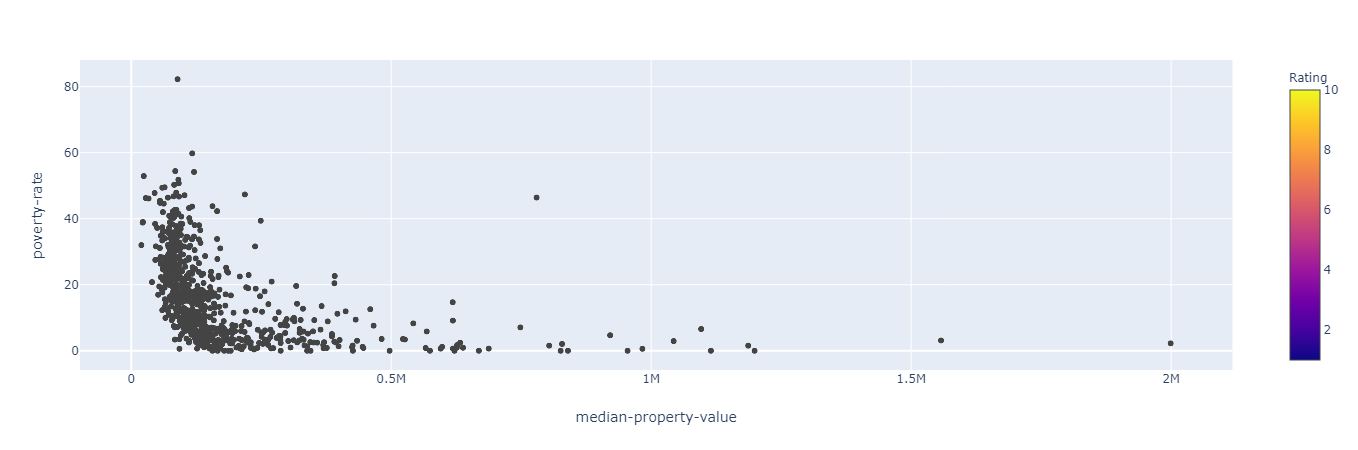

In [78]:
ax4 = px.scatter(full_dataset, x= "median-property-value", y = "poverty-rate", color = "Rating")
ax4.show()